In [3]:
#Import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import f1_score

from sklearn.inspection import permutation_importance
import json, pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.shape

(10127, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df.drop(["CLIENTNUM",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
         "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],axis=1,inplace=True)

In [8]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [10]:
#changed Target column name
df.rename(columns={'Attrition_Flag':'Target'}, inplace=True)

In [11]:
df.head(2)

,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [12]:
df.tail(2)

,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [13]:
#changed target column variables
Target_mapping = {'Attrited Customer': 1, 'Existing Customer': 0}
df['Target'] = df['Target'].map(Target_mapping)

In [14]:
df["Target"]

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Target, Length: 10127, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Target                    10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [16]:
df.describe()

,Target,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [17]:
df.describe(include=["O"])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


In [18]:
class_counts = df['Target'].value_counts()
class_counts

Target
0    8500
1    1627
Name: count, dtype: int64

In [19]:
# Data imbalance calculating
class_value_counts = df['Target'].value_counts()
imbalance_ratio = class_value_counts[1] / class_value_counts[0]
imbalance_percentage = (class_value_counts[1] / df.shape[0]) * 100
print("Class Counts:", class_value_counts)
print(f"Imbalance Ratio: {imbalance_ratio:}")
print(f"Imbalance Percentage: {imbalance_percentage:}%")

Class Counts: Target
0    8500
1    1627
Name: count, dtype: int64
Imbalance Ratio: 0.19141176470588236
Imbalance Percentage: 16.065962279055988%


In [20]:
df.head()

,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
# Count "unknown" values in each categorical column
categorical_columns = df.select_dtypes(include='object').columns
unknown_counts = df[categorical_columns].apply(lambda x: (x == 'Unknown').sum())

print("Unknown Value Counts:")
print(unknown_counts)

Unknown Value Counts:
Gender                0
Education_Level    1519
Marital_Status      749
Income_Category    1112
Card_Category         0
dtype: int64


In [22]:
#filled "Unknown" with mode of columns
df['Income_Category'] = df['Income_Category'].replace('Unknown', 'Less than $40K')
df['Education_Level'] = df['Education_Level'].replace('Unknown', 'Graduate')
df['Marital_Status'] = df['Marital_Status'].replace('Unknown', 'Married')

In [23]:
categorical_columns = df.select_dtypes(include='object').columns
unknown_counts = df[categorical_columns].apply(lambda x: (x == 'Unknown').sum())

print("Unknown Value Counts:")
print(unknown_counts)


Unknown Value Counts:
Gender             0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
dtype: int64


In [24]:
numerical_columns = df.select_dtypes(np.number).columns
unknown_counts = df[numerical_columns].apply(lambda x: (x == 'NaN').sum())

print("Unknown Value Counts:")
print(unknown_counts)


Unknown Value Counts:
Target                      0
Customer_Age                0
Dependent_count             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [25]:
df.duplicated().sum()

0

# EDA

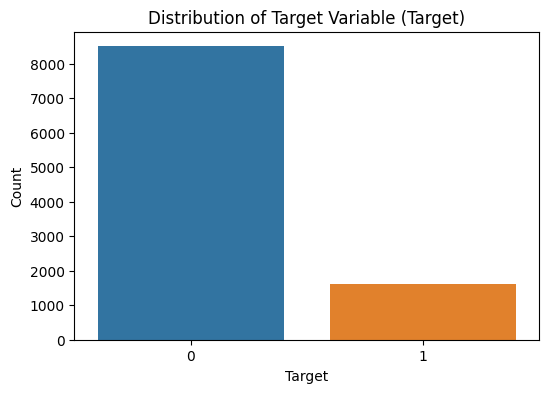

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Target')
plt.title('Distribution of Target Variable (Target)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


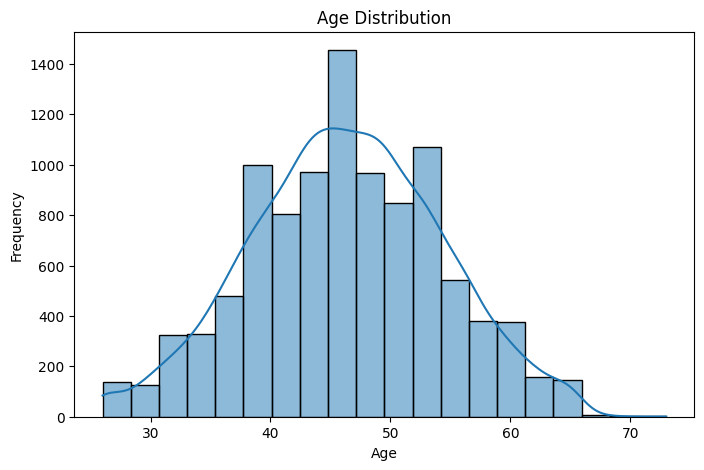

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Customer_Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

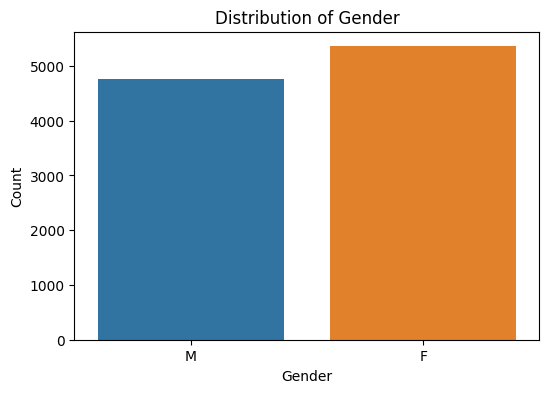

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

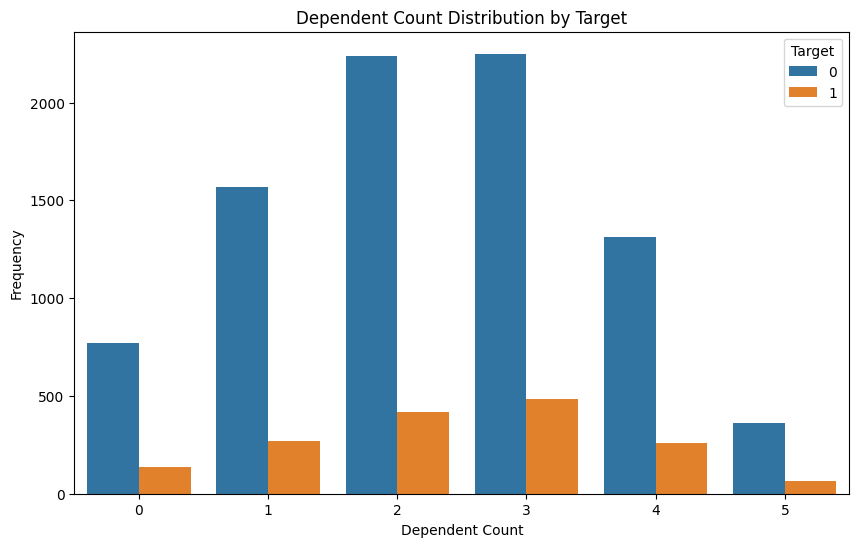

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dependent_count', hue='Target')
plt.title('Dependent Count Distribution by Target')
plt.xlabel('Dependent Count')
plt.ylabel('Frequency')
plt.show()

In [30]:
df.Education_Level.value_counts()

Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

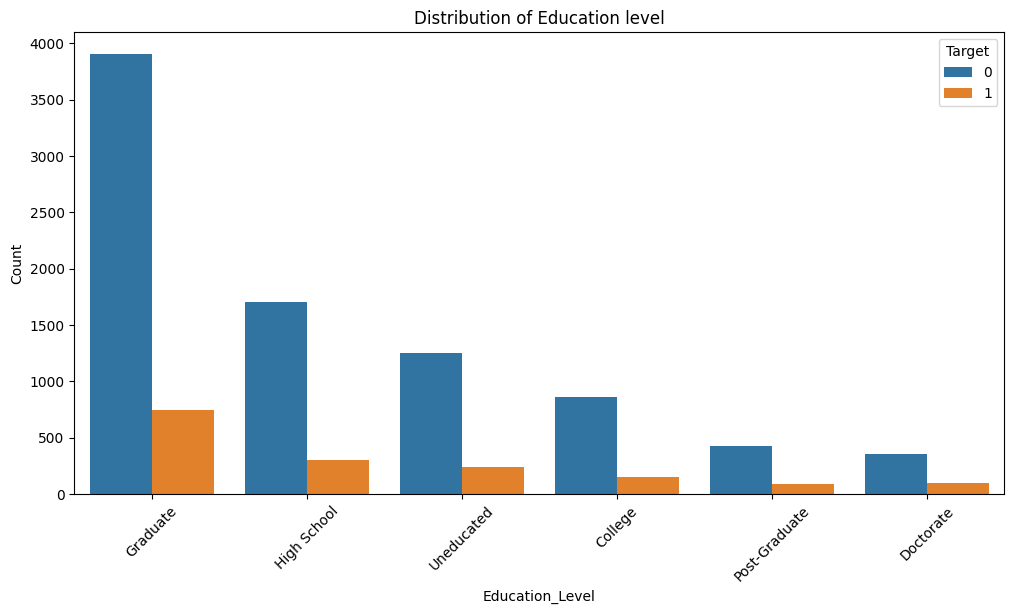

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Education_Level',hue="Target" ,order=df['Education_Level'].value_counts().index)
plt.title('Distribution of Education level')
plt.xlabel('Education_Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

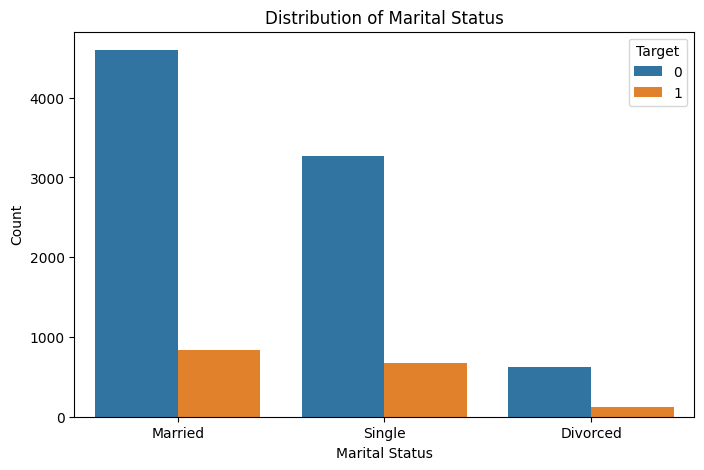

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital_Status',hue="Target", order=df['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Target                    10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

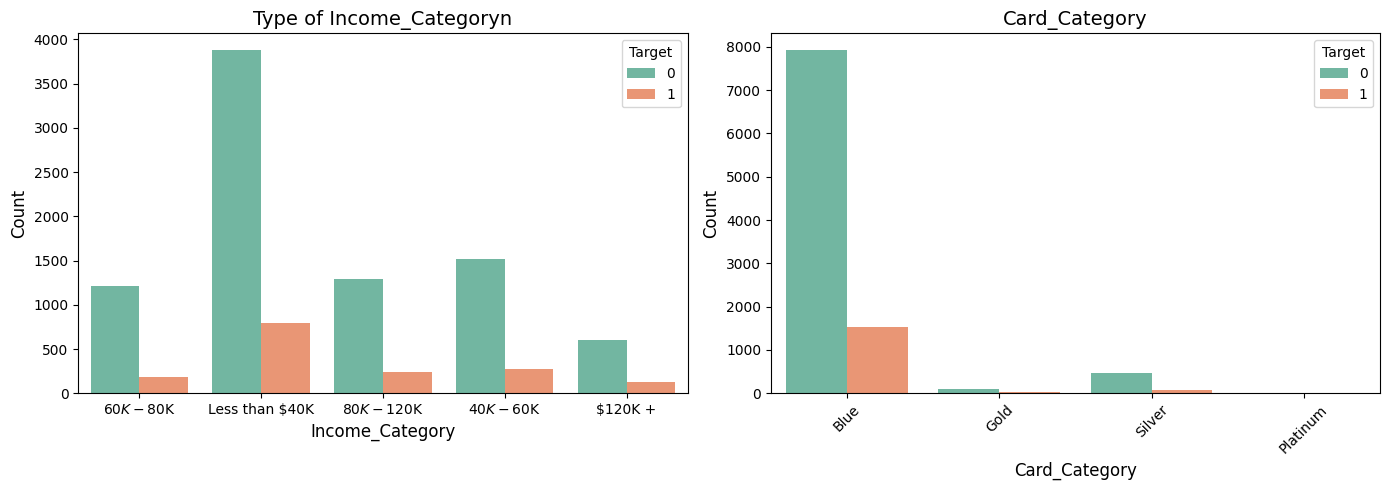

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Income_Category', hue='Target', ax=axes[0], palette='Set2' )
axes[0].set_title('Type of Income_Categoryn', fontsize=14)
axes[0].set_xlabel('Income_Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Target', labels=['0', '1'])

sns.countplot(data=df, x='Card_Category', hue='Target',
              ax=axes[1], palette='Set2')
axes[1].set_title('Card_Category', fontsize=14)
axes[1].set_xlabel('Card_Category', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Target', labels=['0', '1'])

plt.tight_layout()

plt.show()

In [35]:
df["Months_on_book"]

0        39
1        44
2        36
3        34
4        21
         ..
10122    40
10123    25
10124    36
10125    36
10126    25
Name: Months_on_book, Length: 10127, dtype: int64

In [36]:
Columns = ['Total_Relationship_Count',
           'Months_Inactive_12_mon',
           'Contacts_Count_12_mon',
           'Credit_Limit',
           'Total_Revolving_Bal',
           'Avg_Open_To_Buy',
           'Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt',
           'Total_Trans_Ct',
           'Total_Ct_Chng_Q4_Q1',
           'Avg_Utilization_Ratio']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


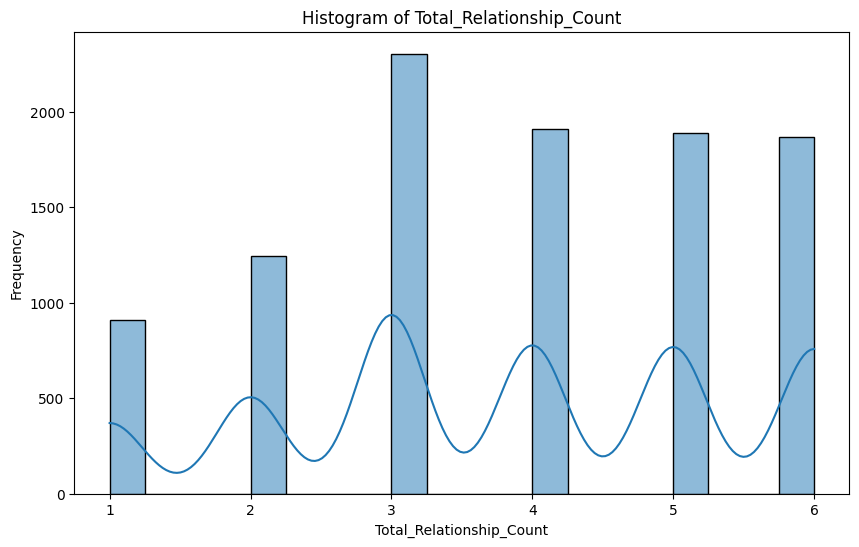

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


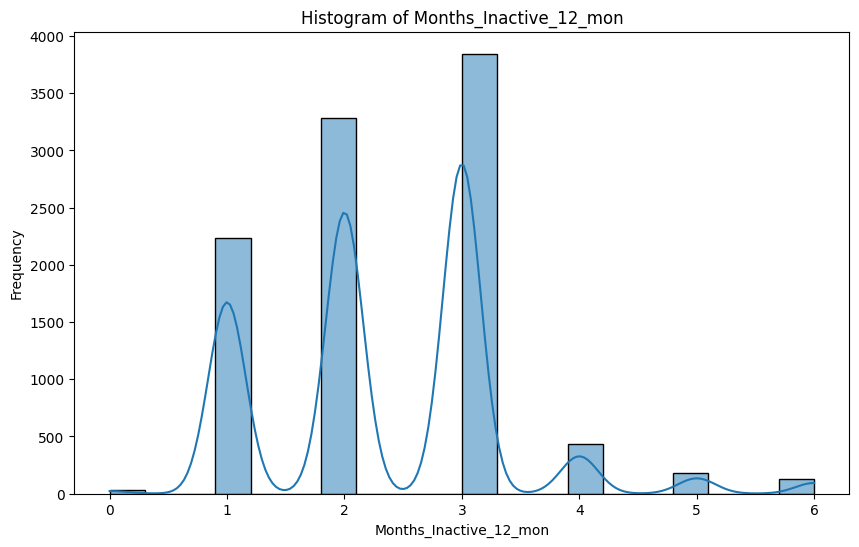

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


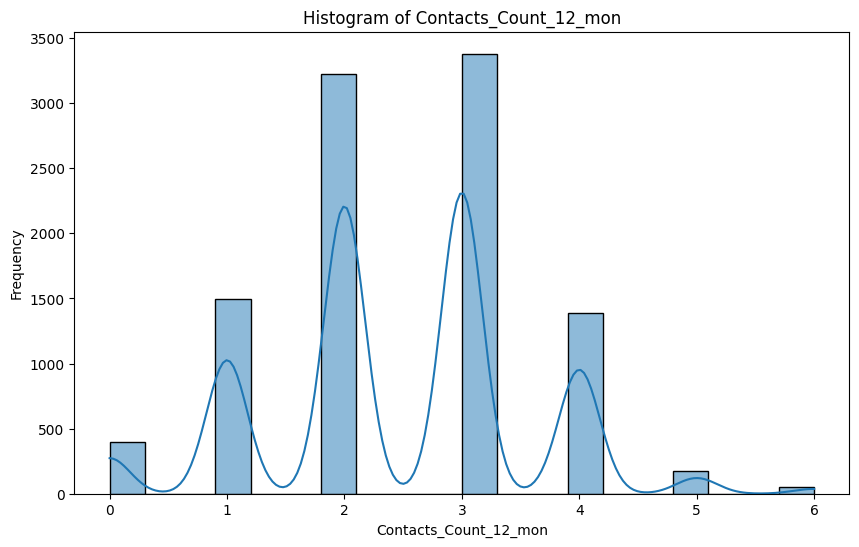

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


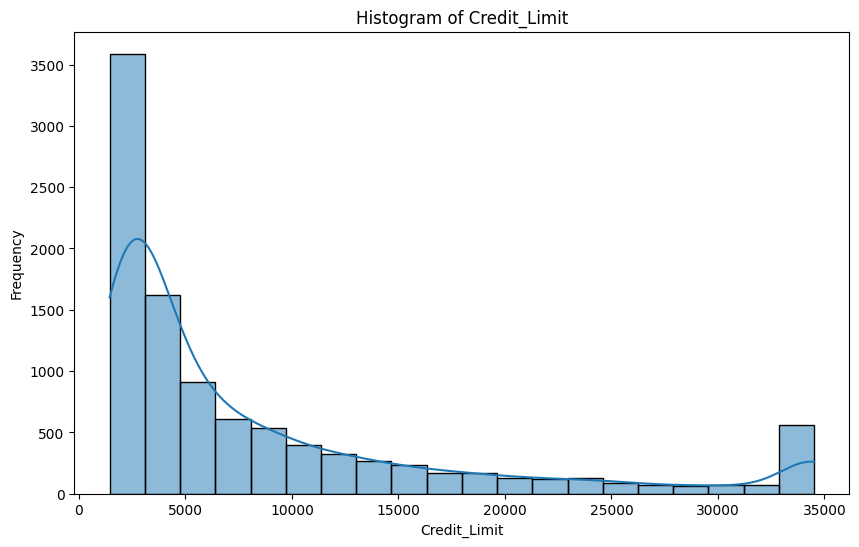

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


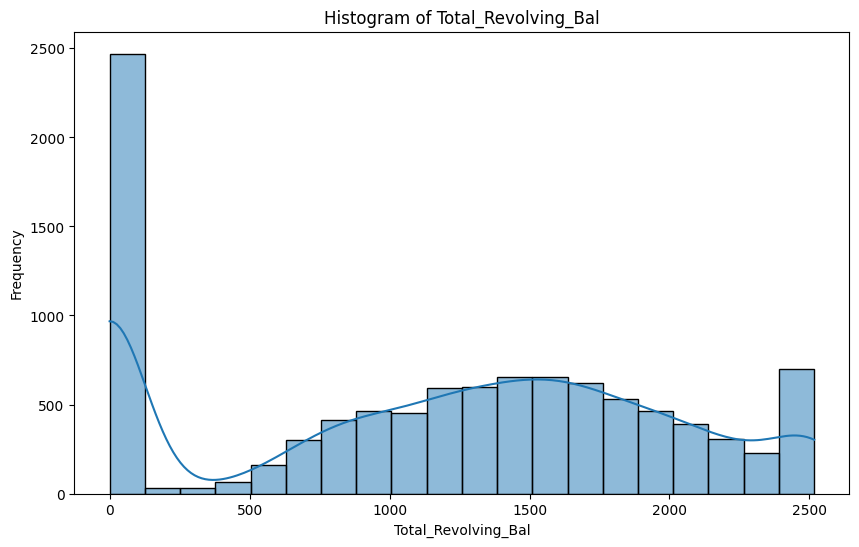

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


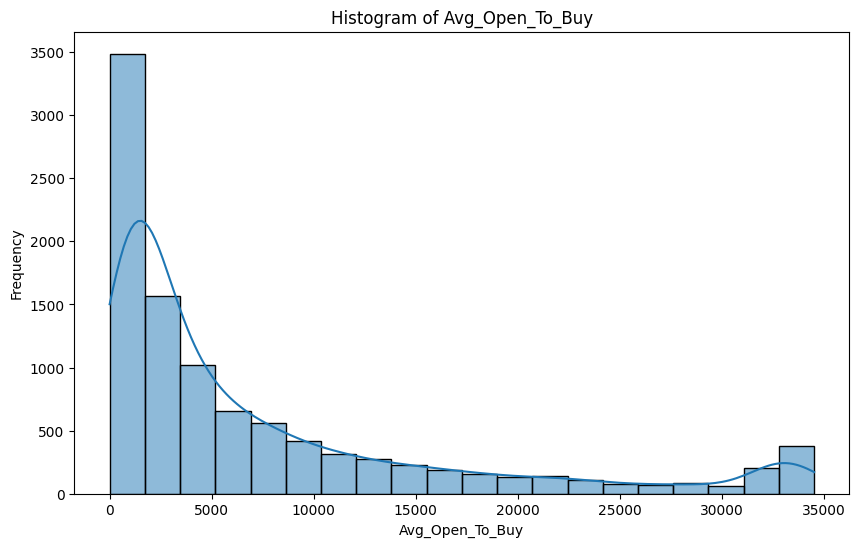

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


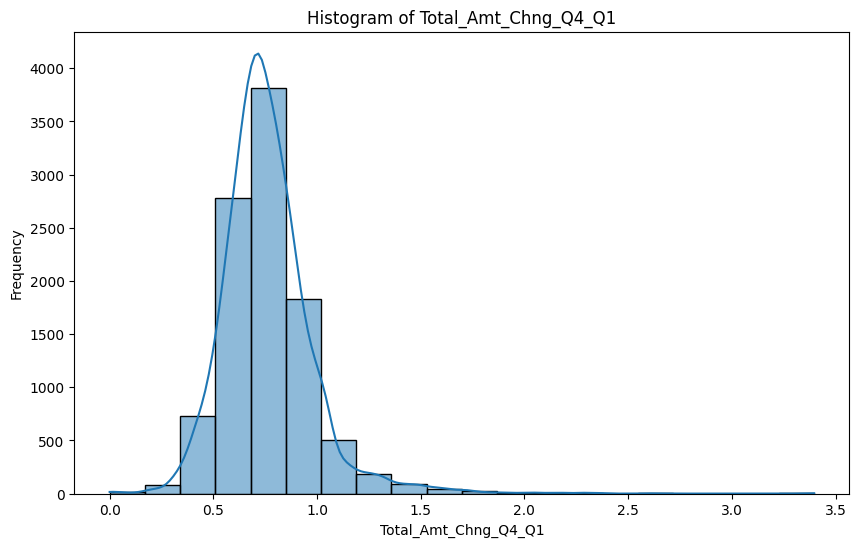

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


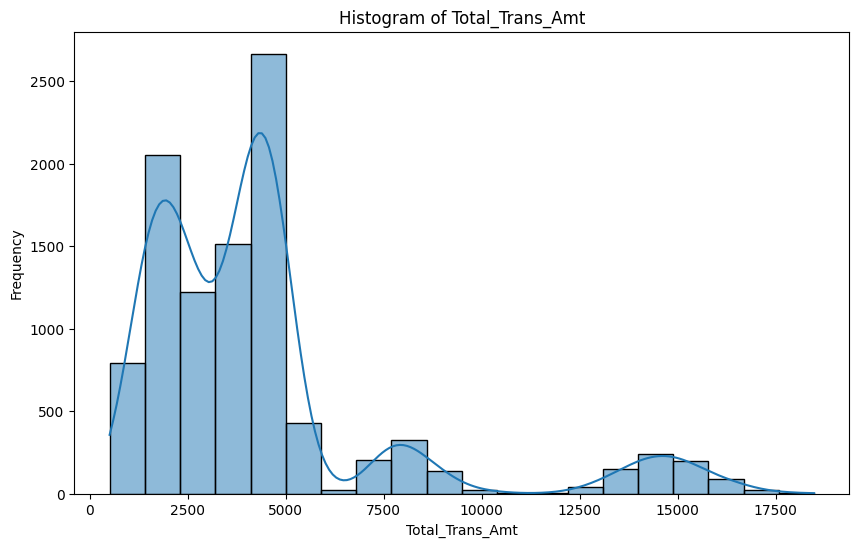

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


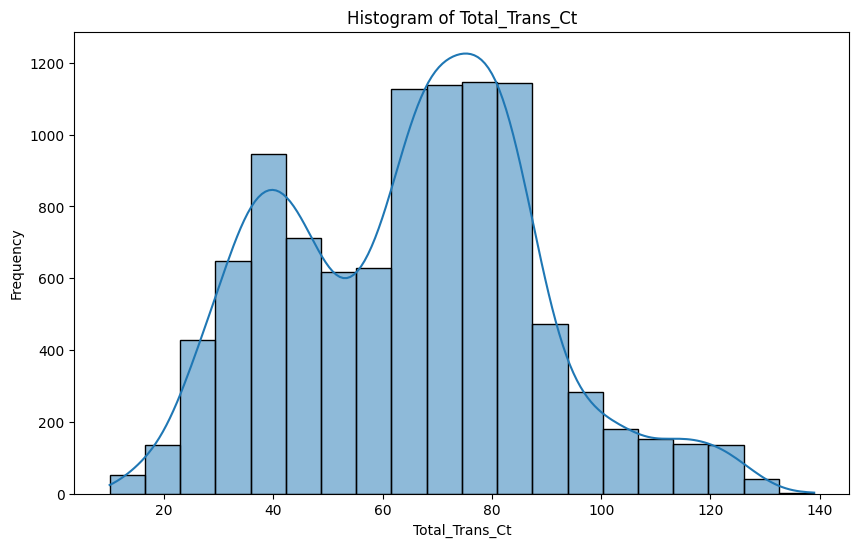

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


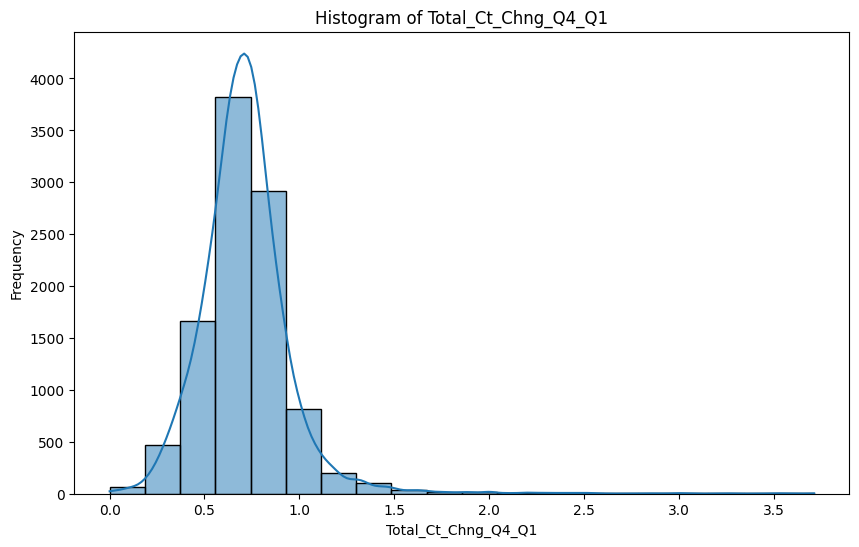

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


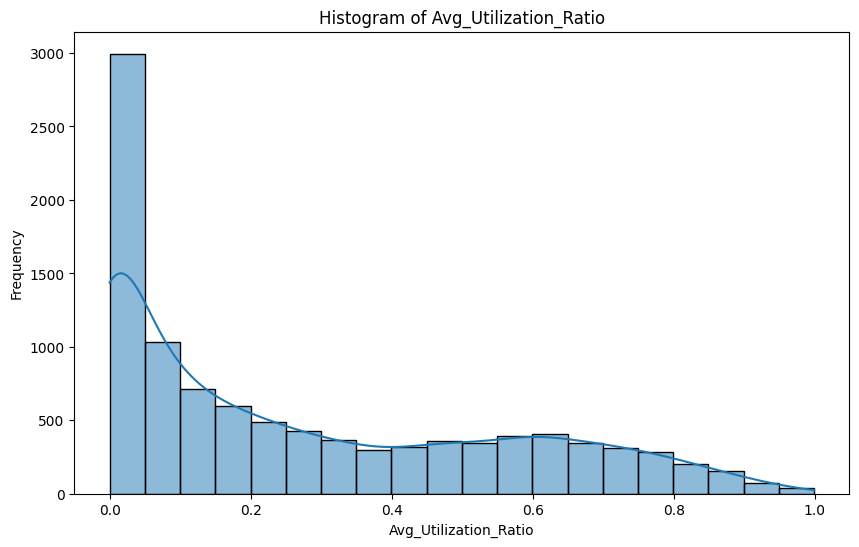

In [37]:
for i in Columns:
    plt.figure(figsize=(10, 6)) 
    sns.histplot(df[i], bins=20, edgecolor='black',kde=True)
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

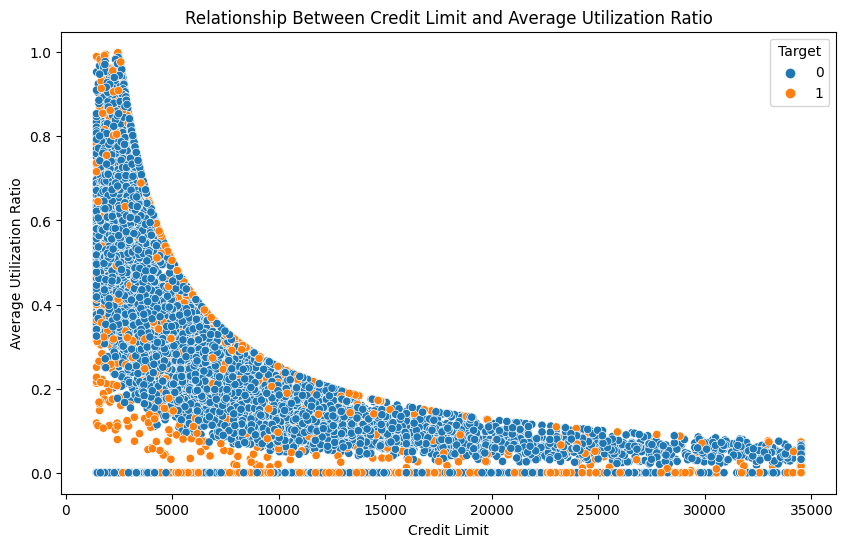

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio',hue="Target")
plt.title('Relationship Between Credit Limit and Average Utilization Ratio')
plt.xlabel('Credit Limit')
plt.ylabel('Average Utilization Ratio')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


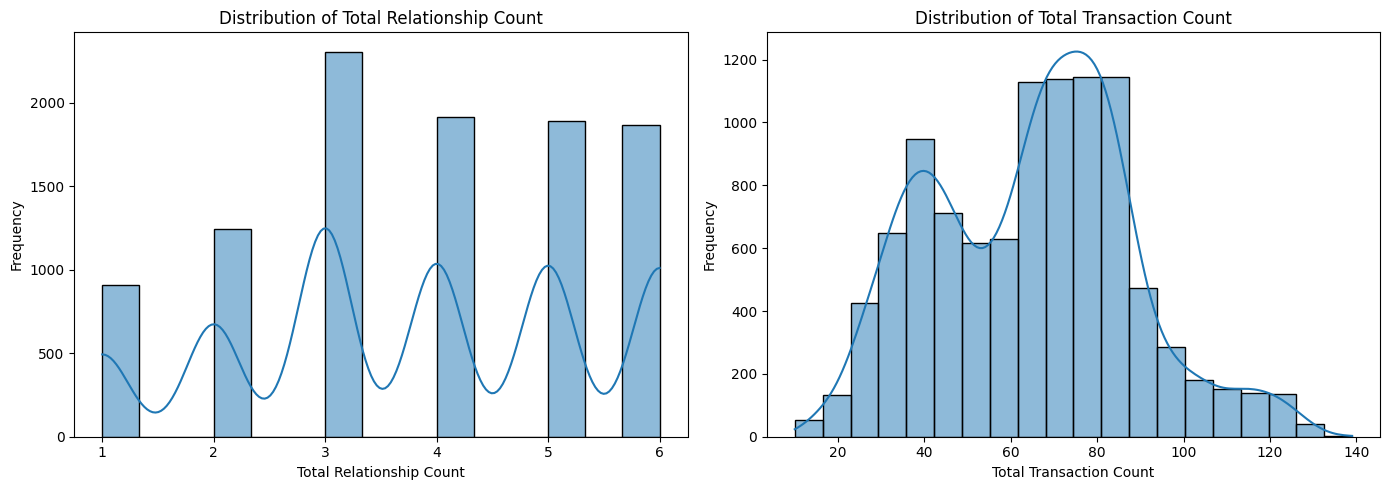

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Total Relationship Count için histogram
sns.histplot(data=df, x='Total_Relationship_Count', bins=15, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Total Relationship Count')
ax[0].set_xlabel('Total Relationship Count')
ax[0].set_ylabel('Frequency')

# Total Transaction Count için histogram
sns.histplot(data=df, x='Total_Trans_Ct', bins=20, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Total Transaction Count')
ax[1].set_xlabel('Total Transaction Count')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Target                    10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [41]:
df["Income_Category"].value_counts()

Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [42]:
income_category_mapping = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4
}

df['Income_Category'] = df['Income_Category'].map(income_category_mapping)

In [43]:
income_category_mapping = {
    "Less than $40K": 0,
    "$40K - $60K": 1,
    "$60K - $80K": 2,
    "$80K - $120K": 3,
    "$120K +": 4
}

In [44]:
df.head()

,Target,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Married,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [45]:
encoded_columns = pd.get_dummies(df[['Marital_Status', 'Card_Category','Gender','Education_Level']], drop_first=True)
df_encoded = df.drop(['Marital_Status', 'Card_Category','Gender'], axis=1).join(encoded_columns)

encoded_columns = [col for col in df_encoded.columns if 'Marital_Status_' in col or 'Card_Category_' in col or 'Gender' in col or 'Education_Level' in col]
df_encoded[encoded_columns] = df_encoded[encoded_columns].applymap(lambda x: 1 if x else 0)

df_encoded.head()

/tmp/ipykernel_26/1088670676.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded[encoded_columns] = df_encoded[encoded_columns].applymap(lambda x: 1 if x else 0)


,Target,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Single,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated
0,0,45,3,1,2,39,5,1,3,12691.0,...,0,0,0,0,1,0,0,1,0,0
1,0,49,5,1,0,44,6,1,2,8256.0,...,1,0,0,0,0,0,1,0,0,0
2,0,51,3,1,3,36,4,1,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,4,1,0,34,3,4,1,3313.0,...,0,0,0,0,0,0,0,1,0,0
4,0,40,3,1,2,21,5,1,0,4716.0,...,0,0,0,0,1,0,0,0,0,1


In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Dependent_count                10127 non-null  int64  
 3   Education_Level                10127 non-null  int64  
 4   Income_Category                10127 non-null  int64  
 5   Months_on_book                 10127 non-null  int64  
 6   Total_Relationship_Count       10127 non-null  int64  
 7   Months_Inactive_12_mon         10127 non-null  int64  
 8   Contacts_Count_12_mon          10127 non-null  int64  
 9   Credit_Limit                   10127 non-null  float64
 10  Total_Revolving_Bal            10127 non-null  int64  
 11  Avg_Open_To_Buy                10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1           10127 non-null 

# Feature Importance

In [47]:
def Featur_importance_randomforest(X, y, n_estimators=100, random_state=42, top_n=15):
    
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)

    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_features = feature_importance_df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_features, x='Importance', y='Feature')
    plt.title(f'Top {top_n} Most Important Features', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(True)
    plt.show()


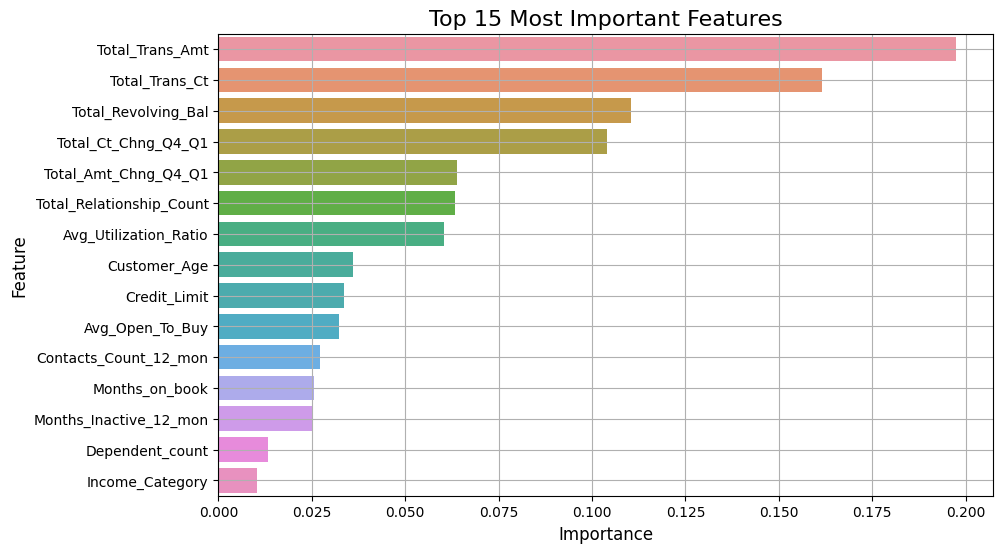

In [48]:
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

Featur_importance_randomforest(X, y, n_estimators=100, random_state=42, top_n=15)

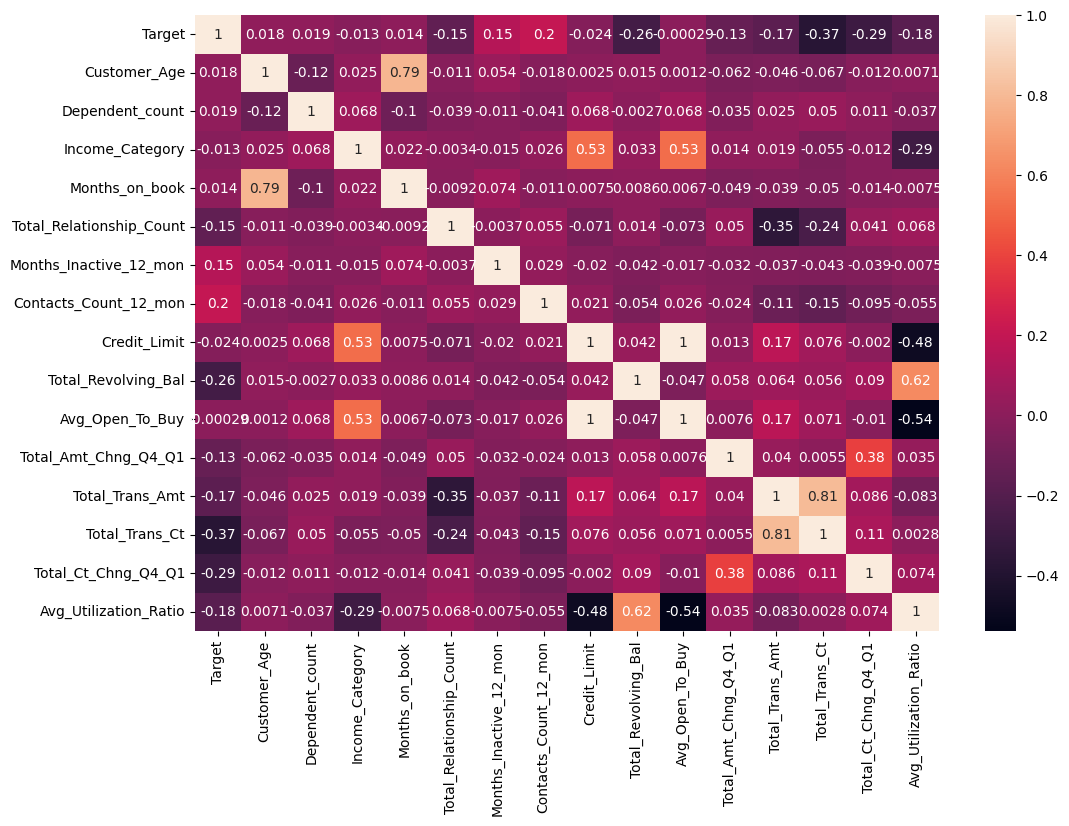

In [49]:
numerical_veriables = df.select_dtypes(np.number)
numerical_veriables.corr()
plt.figure(figsize=(12,8))
sns.heatmap(numerical_veriables.corr(),annot=True,fmt=".2g")
plt.show()

# MODELING

In [50]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Target'])  # Features
y = df_encoded['Target']  # Target

In [51]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"Before SMOTE: {y_resampled.value_counts()}")
print(f"After SMOTE: {y_test.value_counts()}")

Before SMOTE: Target
0    8500
1    8500
Name: count, dtype: int64
After SMOTE: Target
0    2550
1    2550
Name: count, dtype: int64


In [52]:
# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
threshold = 0.5

# Use the custom threshold to make binary predictions
y_pred_custom = (y_pred_prob >= threshold).astype(int)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Accuracy: 0.886078431372549

Confusion Matrix:
 [[2270  280]
 [ 301 2249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      2550
           1       0.89      0.88      0.89      2550

    accuracy                           0.89      5100
   macro avg       0.89      0.89      0.89      5100
weighted avg       0.89      0.89      0.89      5100



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# Create an XGBoost classifier and fit it to the training data
xgb_classifier = xgb.XGBClassifier(random_state=42, learning_rate= 0.2, n_estimators= 300)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9831372549019608

Confusion Matrix:
 [[2495   55]
 [  31 2519]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2550
           1       0.98      0.99      0.98      2550

    accuracy                           0.98      5100
   macro avg       0.98      0.98      0.98      5100
weighted avg       0.98      0.98      0.98      5100



# Model Selection

For KNN Classifier::
Training Accuracy: 0.948655462184874
Testing Accuracy: 0.9131372549019607
Training F1-Score: 0.9491214922141726
Testing F1-Score: 0.9140973434167152
Confusion Matrix:
[[2300  250]
 [ 193 2357]]
------------------------------------------------------------


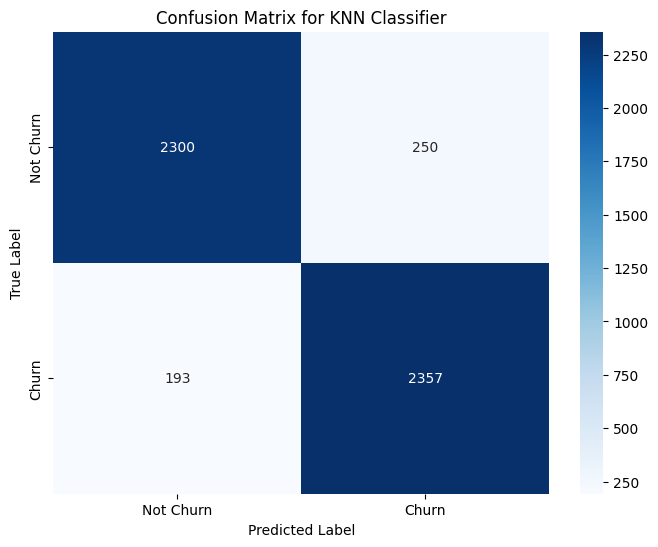

For Decision Tree::
Training Accuracy: 1.0
Testing Accuracy: 0.9482352941176471
Training F1-Score: 1.0
Testing F1-Score: 0.9488768396591789
Confusion Matrix:
[[2386  164]
 [ 100 2450]]
------------------------------------------------------------


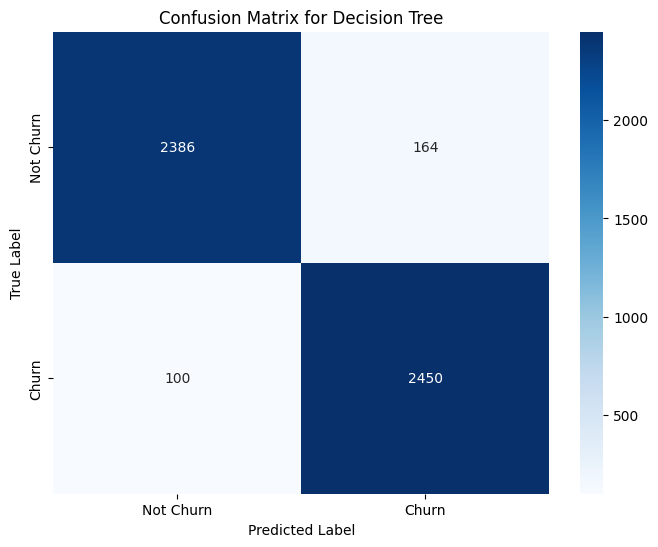

For RandomForest::
Training Accuracy: 1.0
Testing Accuracy: 0.9739215686274509
Training F1-Score: 1.0
Testing F1-Score: 0.9741496598639455
Confusion Matrix:
[[2461   89]
 [  44 2506]]
------------------------------------------------------------


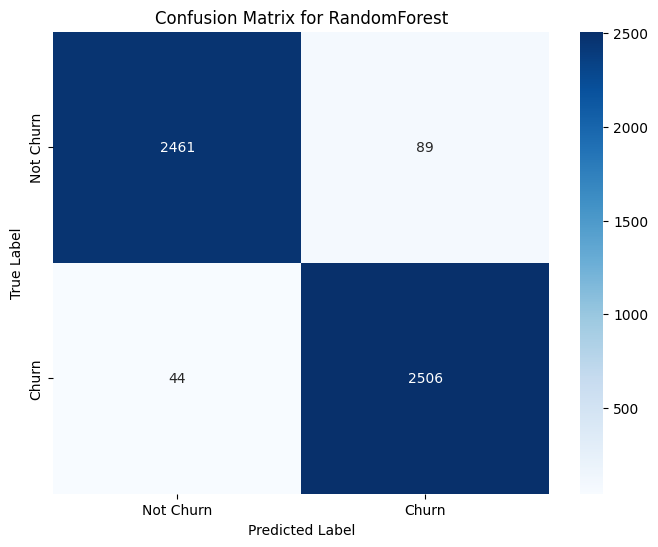

For AdaBoost::
Training Accuracy: 0.9638655462184874
Testing Accuracy: 0.9627450980392157
Training F1-Score: 0.9641068447412354
Testing F1-Score: 0.9629773967264224
Confusion Matrix:
[[2439  111]
 [  79 2471]]
------------------------------------------------------------


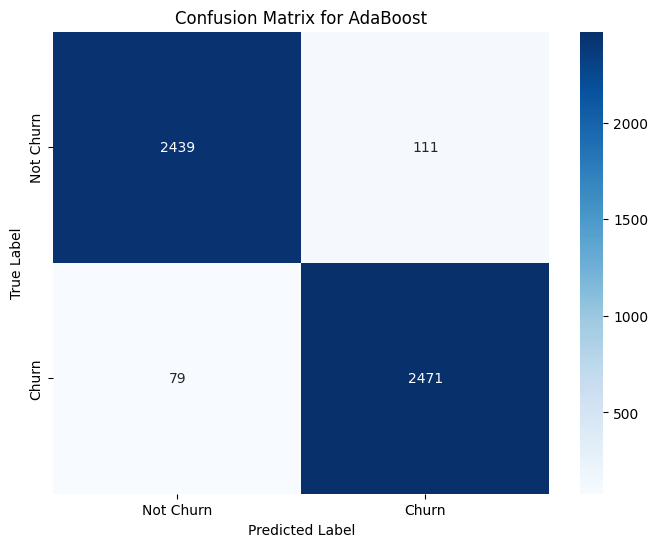

For XGBoost::
Training Accuracy: 1.0
Testing Accuracy: 0.9835294117647059
Training F1-Score: 1.0
Testing F1-Score: 0.9836129535700351
Confusion Matrix:
[[2495   55]
 [  29 2521]]
------------------------------------------------------------


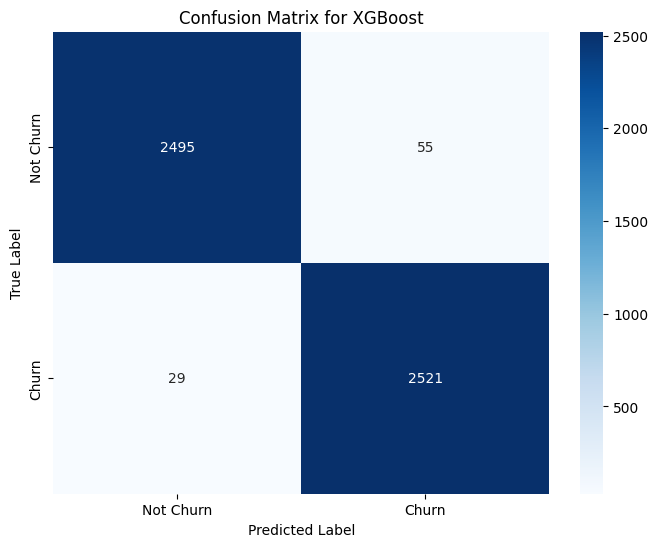

For Gradient Boosting::
Training Accuracy: 0.9772268907563025
Testing Accuracy: 0.9713725490196078
Training F1-Score: 0.9773392424115729
Testing F1-Score: 0.9715510522213562
Confusion Matrix:
[[2461   89]
 [  57 2493]]
------------------------------------------------------------


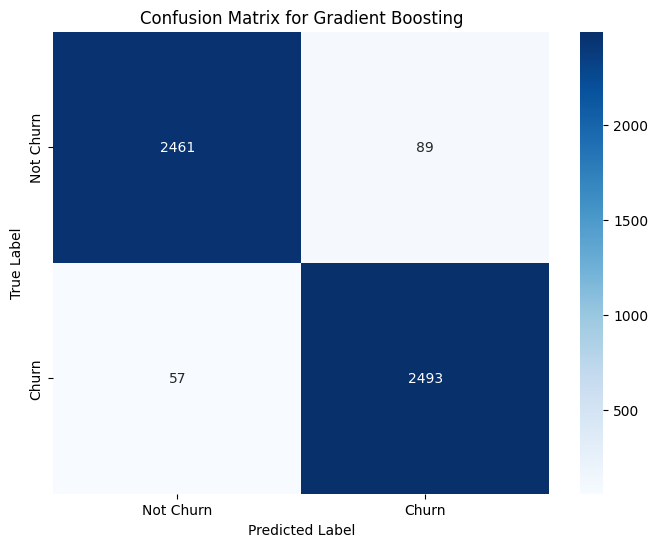

In [54]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionaries to store accuracy, F1-score, and confusion matrix results
accuracy_results = {}
f1_score_results = {}
confusion_matrices = {}

# List of classifiers to compare
models = [
    ("KNN Classifier", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store results in dictionaries
    accuracy_results[name] = (accuracy_train, accuracy_test)
    f1_score_results[name] = (f1_train, f1_test)
    confusion_matrices[name] = conf_matrix

    print(f"For {name}::")
    print(f"Training Accuracy: {accuracy_train}")
    print(f"Testing Accuracy: {accuracy_test}")
    print(f"Training F1-Score: {f1_train}")
    print(f"Testing F1-Score: {f1_test}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print("------" * 10)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Churn', 'Churn'], 
                yticklabels=['Not Churn', 'Churn'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [55]:
results_df = pd.DataFrame({
    'Model': list(accuracy_results.keys()),
    'Accuracy (Train)': [acc[0] for acc in accuracy_results.values()],
    'Accuracy (Test)': [acc[1] for acc in accuracy_results.values()],
    'F1-Score (Train)': [f1[0] for f1 in f1_score_results.values()],
    'F1-Score (Test)': [f1[1] for f1 in f1_score_results.values()]
})

results_df.set_index('Model', inplace=True)
results_df

,Accuracy (Train),Accuracy (Test),F1-Score (Train),F1-Score (Test)
Model,,,,
KNN Classifier,0.948655,0.913137,0.949121,0.914097
Decision Tree,1.000000,0.948235,1.000000,0.948877
RandomForest,1.000000,0.973922,1.000000,0.974150
AdaBoost,0.963866,0.962745,0.964107,0.962977
XGBoost,1.000000,0.983529,1.000000,0.983613
Gradient Boosting,0.977227,0.971373,0.977339,0.971551


# Hyperparameter tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   scoring='accuracy', cv=3, n_jobs=-1, n_iter=10, random_state=42)

random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_

best_rf_model_random = random_search.best_estimator_

y_pred_random = best_rf_model_random.predict(X_test)

# Calculate the F1-score and accuracy
f1_score_test_random = f1_score(y_test, y_pred_random)
accuracy_test_random = accuracy_score(y_test, y_pred_random)

print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)
print("Testing F1-Score (RandomizedSearchCV):", f1_score_test_random)
print("Testing Accuracy (RandomizedSearchCV):", accuracy_test_random)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Testing F1-Score (RandomizedSearchCV): 0.9745383867832846
Testing Accuracy (RandomizedSearchCV): 0.9743137254901961


In [57]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Test Accuracy: 0.9837254901960785


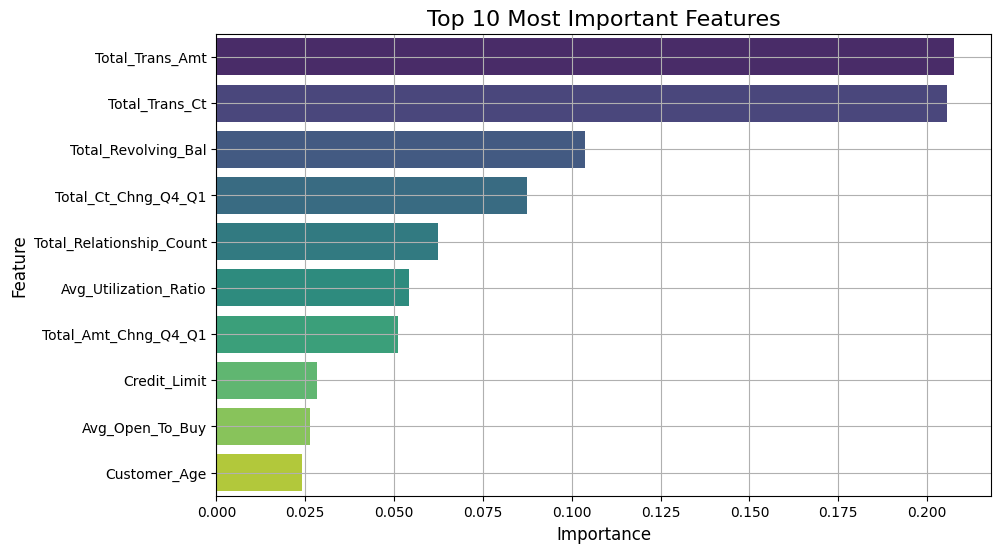

In [58]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=2,min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

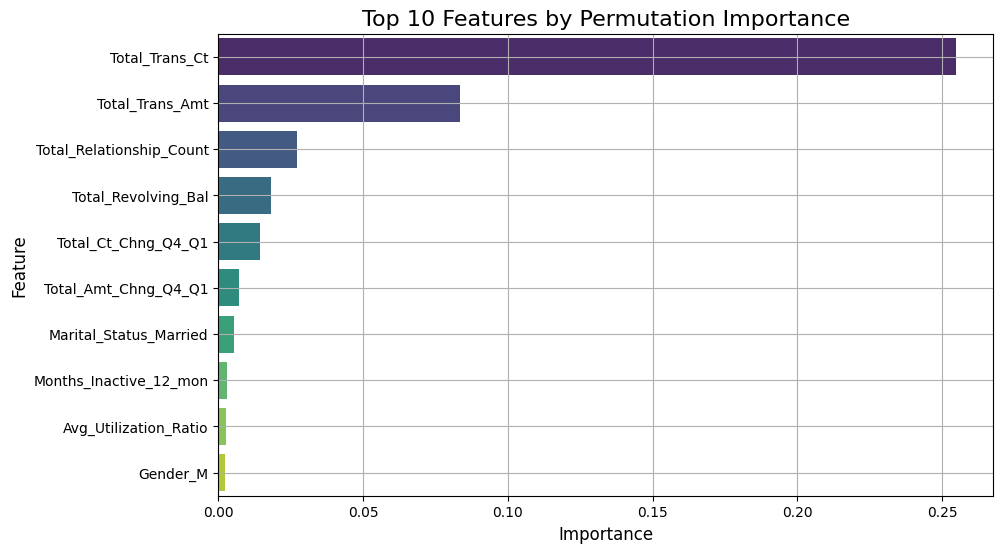

In [59]:
# Calculate permutation importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=42)

# Create a DataFrame to store feature names and their importances
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean})

# Sort features by importance in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importance for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features by Permutation Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True)
plt.show()

# Model Deployment

In [60]:
best_params = {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}

xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=300,
    subsample=0.9
)

# Train the model on your training data
xgb.fit(X_train, y_train)

xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
with open("model.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [62]:
model_file_path = "model.pkl"
# Load the model from the file
with open(model_file_path, "rb") as f:
    loaded_model = pickle.load(f)
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)